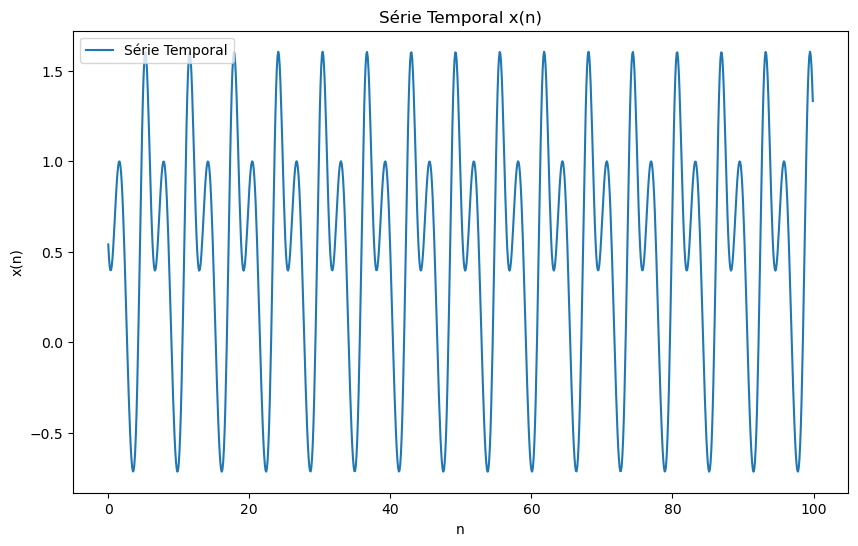

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,363 (13.14 KB)

 Trainable params: 3,363 (13.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5842 - mae: 0.6428 - val_loss: 0.0178 - val_mae: 0.1084
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2634 - mae: 0.4185 - val_loss: 0.0106 - val_mae: 0.0916
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0865 - mae: 0.2430 - val_loss: 0.0108 - val_mae: 0.0795
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0442 - mae: 0.1711 - val_loss: 0.0042 - val_mae: 0.0566
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 - mae: 0.1444 - val_loss: 0.0029 - val_mae: 0.0516
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mae: 0.1228 - val_loss: 0.0022 - val_mae: 0.0392
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223 - mae: 0.1141 - val_loss: 0.0021 - val_mae: 0.0402
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - mae: 0.1033 - val_loss: 0.0039 - val_mae: 0.0550
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.014

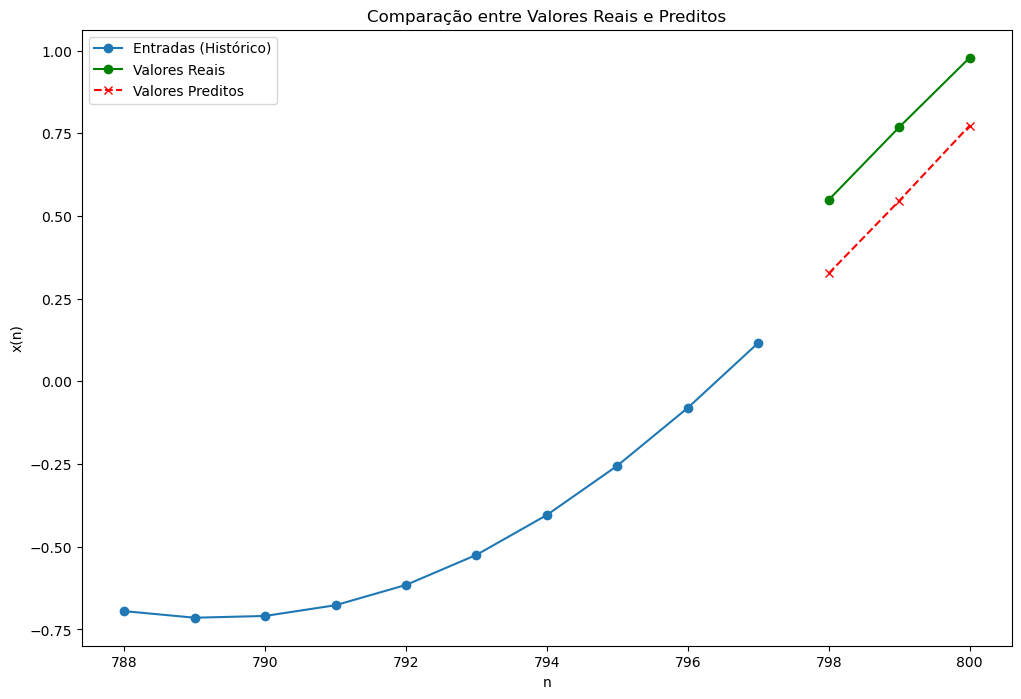

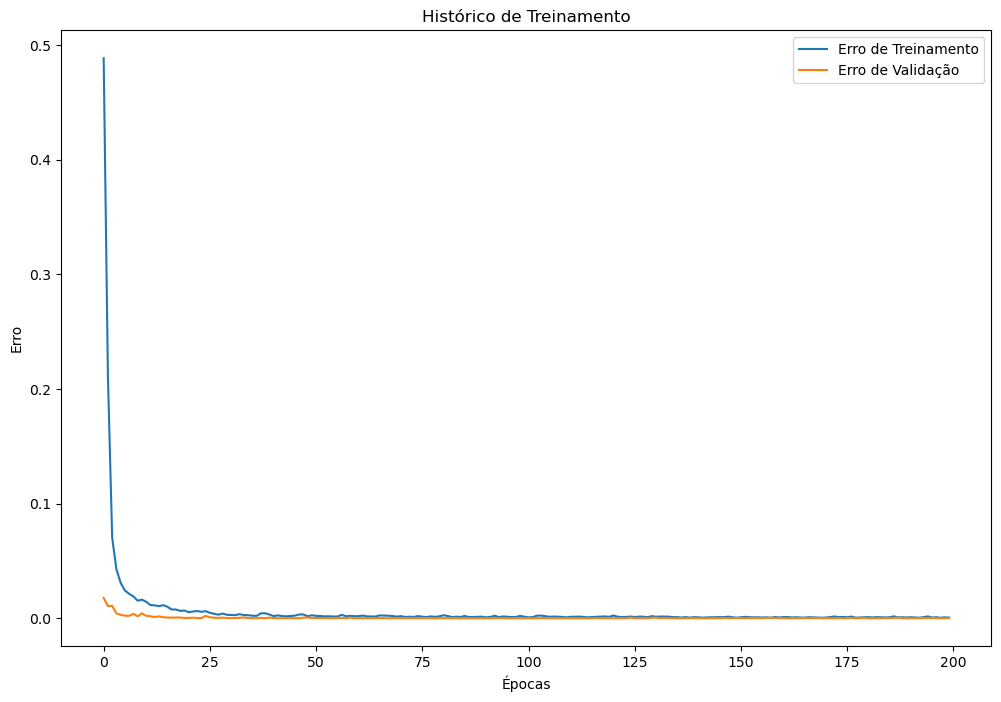

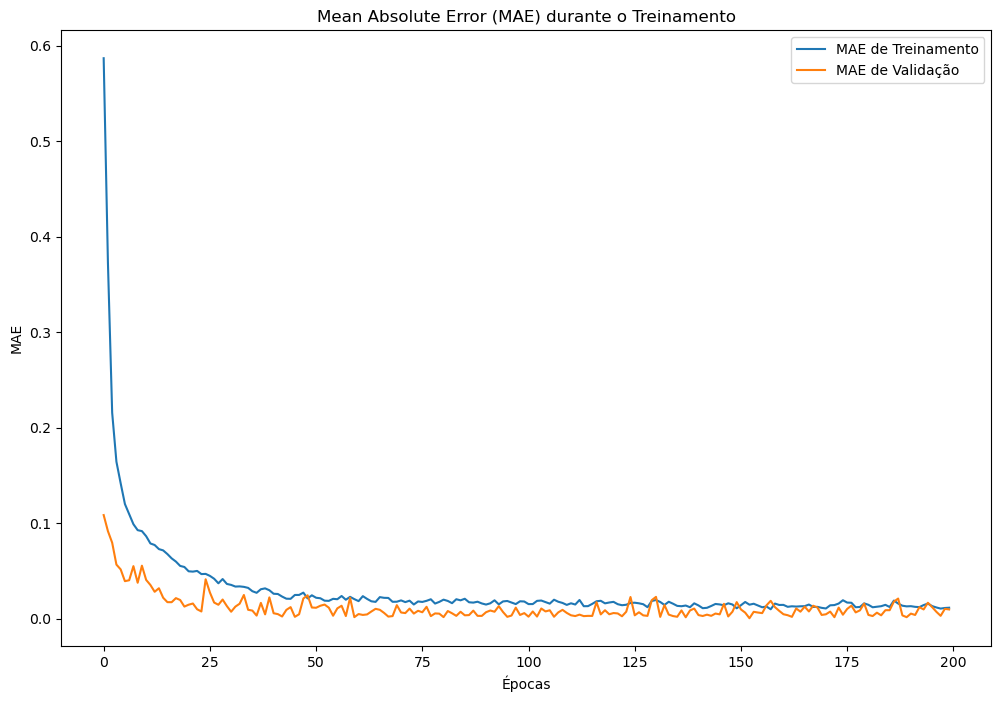

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Valores preditos para o seu input: [0.637492   0.6631561  0.68478733]


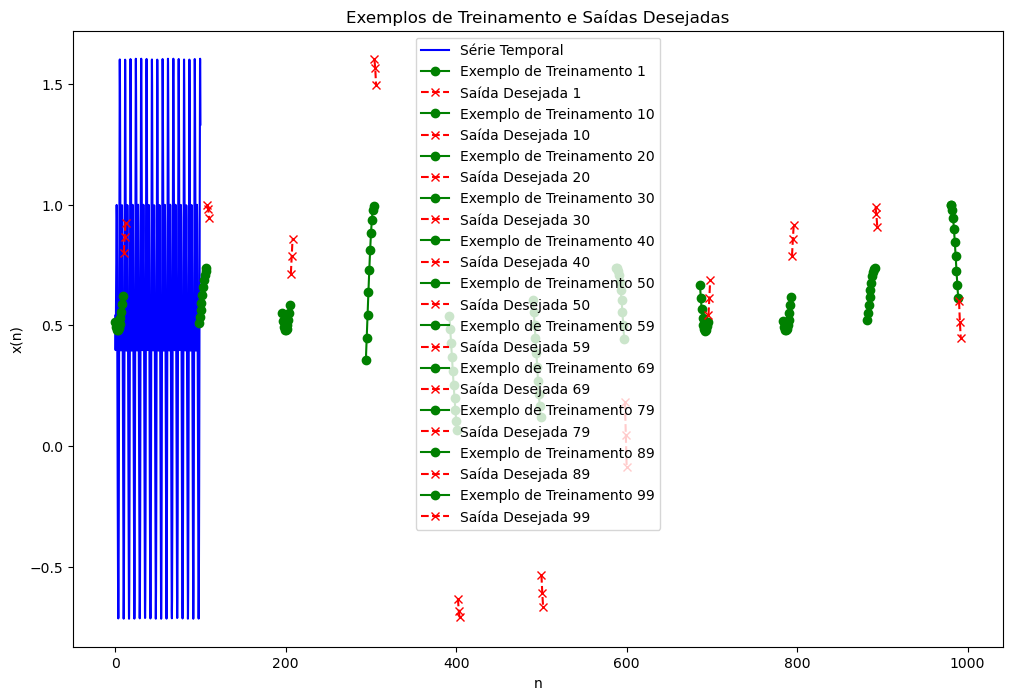

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Gerar a série temporal
n = np.arange(0, 100, 0.1)
x = np.sin(n)**2 + np.cos(n + np.cos(n))

# Plotar a série temporal
plt.figure(figsize=(10, 6))
plt.plot(n, x, label='Série Temporal')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Série Temporal x(n)')
plt.legend()
plt.show()

# Função para criar o dataset
def create_dataset(series, K):
    X, y = [], []
    for i in range(len(series) - K - 3):
        X.append(series[i:i+K])
        y.append(series[i+K:i+K+3])
    return np.array(X), np.array(y)

K = 10
X, y = create_dataset(x, K)

# Normalização dos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=72)

# Criar o modelo
model = Sequential()
model.add(Dense(64, input_dim=K, activation='relu'))
model.add(Dropout(0.002))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.002))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.002))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

# Treinar o modelo
epochs = 200
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.0002)

# Avaliar o modelo
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = np.mean((y_train - y_pred_train)**2, axis=0)
mse_test = np.mean((y_test - y_pred_test)**2, axis=0)

print(f'Erro de predição no conjunto de treinamento para x(n+1): {mse_train[0]}')
print(f'Erro de predição no conjunto de treinamento para x(n+2): {mse_train[1]}')
print(f'Erro de predição no conjunto de treinamento para x(n+3): {mse_train[2]}')

print(f'Erro de predição no conjunto de teste para x(n+1): {mse_test[0]}')
print(f'Erro de predição no conjunto de teste para x(n+2): {mse_test[1]}')
print(f'Erro de predição no conjunto de teste para x(n+3): {mse_test[2]}')

# Função para prever os próximos valores a partir de um ponto específico
def predict_future_steps(start_index):
    if start_index < K or start_index >= len(x) - 3:
        raise ValueError(f"start_index deve estar entre {K} e {len(x) - 4}.")
    
    input_series = x[start_index-K:start_index]
    input_series = scaler.transform(input_series.reshape(1, -1))
    
    prediction = model.predict(input_series)
    return prediction

# Exemplo de uso: prever os valores futuros a partir de um ponto específico
start_index = 798  # Pode alterar para outro ponto de início

predicted_values = predict_future_steps(start_index)
print(f"Valores preditos a partir de x({start_index}): {predicted_values[0]}")

# Comparação com os valores reais
real_values = x[start_index+1:start_index+4]
print(f"Valores reais: {real_values}")

# Plotar os valores reais e preditos para comparação
plt.figure(figsize=(12, 8))
plt.plot(range(start_index-K, start_index), x[start_index-K:start_index], label='Entradas (Histórico)', marker='o', linestyle='-')
plt.plot(range(start_index, start_index+3), real_values, label='Valores Reais', marker='o', linestyle='-', color='green')
plt.plot(range(start_index, start_index+3), predicted_values[0], label='Valores Preditos', marker='x', linestyle='--', color='red')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.show()

# Plotar o histórico de treinamento
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.title('Histórico de Treinamento')
plt.legend()
plt.show()

# Mostrar a acurácia do modelo
mae_train = history.history['mae']
mae_val = history.history['val_mae']

plt.figure(figsize=(12, 8))
plt.plot(mae_train, label='MAE de Treinamento')
plt.plot(mae_val, label='MAE de Validação')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) durante o Treinamento')
plt.legend()
plt.show()

# Função para prever os próximos valores a partir de um ponto específico
def predict_future_steps(input_series):
    scaled_input_series = scaler.transform(input_series.reshape(1, -1))
    prediction = model.predict(scaled_input_series)
    return prediction

# Exemplo de uso: fornecer um input para testar a rede
input_example = np.array([0.5, 0.3, 0.7, 0.2, 0.8, 0.6, 0.4, 0.1, 0.9, 0.5])  # Seu próprio input aqui

predicted_values = predict_future_steps(input_example)
print(f"Valores preditos para o seu input: {predicted_values[0]}")

# Plotar os exemplos de treinamento e as saídas desejadas
plt.figure(figsize=(12, 8))
plt.plot(n, x, label='Série Temporal', color='blue')

for i in range(0, len(X_train), len(X_train)//10):
    plt.plot(range(i, i+K), X_train[i], label=f'Exemplo de Treinamento {i//10+1}', marker='o', linestyle='-', color='green')
    plt.plot(range(i+K, i+K+3), y_train[i], label=f'Saída Desejada {i//10+1}', marker='x', linestyle='--', color='red')

plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Exemplos de Treinamento e Saídas Desejadas')
plt.legend()
plt.show()
